In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data =  pd.read_csv("kc_house_data.csv")
df = pd.DataFrame(data)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
x = data["floors"]
y = data["price"]

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8 ,random_state=1)

In [ ]:
model=LinearRegression()

In [ ]:
x_train.shape
x_train

,floors
15502,2.0
17085,1.0
2426,2.0
16517,1.0
3341,2.0
...,...
10955,2.0
17289,3.0
5192,1.0
12172,1.0


In [ ]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
print(x.dtypes)

float64


In [ ]:
print(y.dtypes)

float64


In [ ]:
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_train)

In [ ]:
rdf = y_pred
rdf = pd.DataFrame()
rdf.head()

""


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regressor = Ridge()

In [ ]:
ridge_regressor

Ridge()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50]}
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)

In [ ]:
ridgecv

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
ridgecv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 5}


In [ ]:
print(ridgecv.best_score_)

-134647747783.31192


In [ ]:
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
ridge_pred = ridgecv.predict(y_train)
print(ridge_pred)

[[6.06617491e+10]
 [4.33360925e+10]
 [5.80702677e+10]
 ...
 [1.12673388e+11]
 [7.57512780e+10]
 [1.78543818e+11]]


<ipython-input-29-88fdcea7abfd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


<Axes: ylabel='Density'>

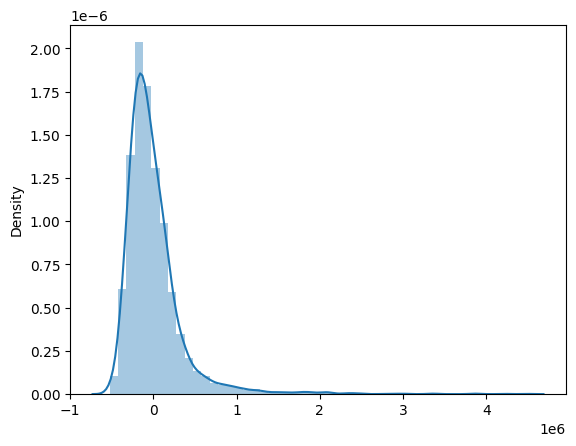

In [ ]:
sns.distplot(y_train-y_pred)

In [ ]:
lasso = Lasso()

In [ ]:
parameters = {'alpha':[1,2,5,10,15,20,25,30,35,40]}
lassocv = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)#cv is used for cross validation or checking the  model
#negative scoring = betters resilts
#it will train the model 5 times so that it will have better accuracy

#ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
print(lassocv.best_params_)
print(lassocv.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid='param_grid')


In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
lasso.fit(x_train,y_train)

In [ ]:
print(lassocv.best_params_)
print(lassocv.best_score_)

In [ ]:
lasso = Lasso()
parameters = {'alpha':[1,2,5,10,15,20,25,30,35,40]}
lassocv = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

# Fit the GridSearchCV object to the data
lassocv.fit(x_train,y_train)  # This line is crucial

# Now you can access best_params_ and best_score_
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 40}
-134648160227.97302


In [ ]:
lasso_pred = lassocv.predict(x_train)
print(lasso_pred)

In [ ]:
sns.distplot(lasso_pred)